# Introduction

This script explores 
1. the characteristics of the **Ku-ring-gai** LGA with those of other LGAs in the same cluster
2. the characteristics of the clusters that contain the **Ku-ring-gai** LGA, with another cluster. The variables will be aggregated at a cluster level and the same analyses as (1) followed

In [14]:
library(MASS)
library(tidyverse)
library(magrittr)
library(reshape2)
library(ggplot2)
library(scales)
library(ggrepel)
library(readxl)
library(corrplot)
library(purrr)
library(rlang)
library(ggcorrplot)
library(ggfortify)
library(AER)

### Theme for plotting

In [133]:
my_theme <- function(base_size = 12, base_family = "sans"){
 theme_grey(base_size = base_size, base_family = base_family) +
   theme(
     axis.text = element_text(size = 12),
     axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
     axis.ticks.length = unit(.25, "cm"),
     axis.title = element_text(size = 14),
     panel.grid.major = element_line(color = "grey"),
     panel.grid.minor = element_blank(),
     panel.background = element_rect(fill = "aliceblue"), # alice blue could be replaced with NA as well,
     panel.border = element_rect(linetype = "solid", fill = NA),
     strip.background = element_rect(fill = "lightgrey", color = "grey", size = 1),
     strip.text = element_text(face = "bold", size = 12, color = "navy"),
     legend.position = "right",
     legend.background = element_blank(),
     legend.title = element_text(face = "bold"),
     panel.spacing  = unit(.5, "lines")
     #panel.border = element_rect(color = "grey", fill = NA, size = 0.5)
   )
}

In [152]:
data_path <- "D:/OneDrive - UTS/36103/AT2B/data2"
cluster_path <- "D:/OneDrive - UTS/36103/AT2/Git/STDS-AT2-Transport/LGA clustering/KMClustGroups2_cosine.csv"
chart_dir <- "D:/OneDrive - UTS/36103/AT2B/charts"

In [153]:
data <- readr::read_csv(paste(data_path, "unified4.csv", sep = "/"))
head(data)
glimpse(data)

Parsed with column specification:
cols(
  LGA = col_character(),
  crime_tot_per_lga = col_double(),
  crime_rate_per_lga = col_double(),
  Sex = col_character(),
  Age = col_character(),
  pop_age_lga = col_double(),
  pop_total = col_double(),
  birthplace_of_person = col_character(),
  birth_value = col_double(),
  `Industry of Employment` = col_character(),
  emp_value = col_double(),
  labour_type = col_character(),
  labour_value = col_double(),
  Pop_Dens_km2 = col_double(),
  seifa_value = col_double(),
  num_service = col_double()
)


LGA,crime_tot_per_lga,crime_rate_per_lga,Sex,Age,pop_age_lga,pop_total,birthplace_of_person,birth_value,Industry of Employment,emp_value,labour_type,labour_value,Pop_Dens_km2,seifa_value,num_service
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,"Agriculture, Forestry and Fishing",0,employed,0,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,"Agriculture, Forestry and Fishing",0,unemployed,834,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Mining,0,employed,0,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Mining,0,unemployed,834,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Manufacturing,0,employed,0,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Manufacturing,0,unemployed,834,170.5,964,1769


Observations: 11,616,480
Variables: 16
$ LGA                      <chr> "albury", "albury", "albury", "albury", "a...
$ crime_tot_per_lga        <dbl> 6233, 6233, 6233, 6233, 6233, 6233, 6233, ...
$ crime_rate_per_lga       <dbl> 0.1220219, 0.1220219, 0.1220219, 0.1220219...
$ Sex                      <chr> "Females", "Females", "Females", "Females"...
$ Age                      <chr> "85 and over", "85 and over", "85 and over...
$ pop_age_lga              <dbl> 845, 845, 845, 845, 845, 845, 845, 845, 84...
$ pop_total                <dbl> 51081, 51081, 51081, 51081, 51081, 51081, ...
$ birthplace_of_person     <chr> "New Zealand", "New Zealand", "New Zealand...
$ birth_value              <dbl> 2510, 2510, 2510, 2510, 2510, 2510, 2510, ...
$ `Industry of Employment` <chr> "Agriculture, Forestry and Fishing", "Agri...
$ emp_value                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ labour_type              <chr> "employed", "unemployed", "employed", "une...
$ labour_valu

In [154]:
names(data) %<>% tolower

head(data)
glimpse(data)

lga,crime_tot_per_lga,crime_rate_per_lga,sex,age,pop_age_lga,pop_total,birthplace_of_person,birth_value,industry of employment,emp_value,labour_type,labour_value,pop_dens_km2,seifa_value,num_service
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,"Agriculture, Forestry and Fishing",0,employed,0,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,"Agriculture, Forestry and Fishing",0,unemployed,834,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Mining,0,employed,0,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Mining,0,unemployed,834,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Manufacturing,0,employed,0,170.5,964,1769
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Manufacturing,0,unemployed,834,170.5,964,1769


Observations: 11,616,480
Variables: 16
$ lga                      <chr> "albury", "albury", "albury", "albury", "a...
$ crime_tot_per_lga        <dbl> 6233, 6233, 6233, 6233, 6233, 6233, 6233, ...
$ crime_rate_per_lga       <dbl> 0.1220219, 0.1220219, 0.1220219, 0.1220219...
$ sex                      <chr> "Females", "Females", "Females", "Females"...
$ age                      <chr> "85 and over", "85 and over", "85 and over...
$ pop_age_lga              <dbl> 845, 845, 845, 845, 845, 845, 845, 845, 84...
$ pop_total                <dbl> 51081, 51081, 51081, 51081, 51081, 51081, ...
$ birthplace_of_person     <chr> "New Zealand", "New Zealand", "New Zealand...
$ birth_value              <dbl> 2510, 2510, 2510, 2510, 2510, 2510, 2510, ...
$ `industry of employment` <chr> "Agriculture, Forestry and Fishing", "Agri...
$ emp_value                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ labour_type              <chr> "employed", "unemployed", "employed", "une...
$ labour_valu

In [155]:
data %<>%
    mutate(lga = as.factor(lga))

# Loading the Cluster Data

In [156]:
clusters <- readr::read_csv(cluster_path)
head(clusters)
glimpse(clusters)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  x = col_double()
)


X1,x
albury,1
ballina,1
balranald,4
bathurst regional,1
bega valley,5
bellingen,2


Observations: 105
Variables: 2
$ X1 <chr> "albury", "ballina", "balranald", "bathurst regional", "bega val...
$ x  <dbl> 1, 1, 4, 1, 5, 2, 4, 3, 4, 2, 3, 4, 4, 4, 3, 5, 2, 3, 3, 3, 3, 4...


In [157]:
clusters %<>%
    rename(lga = X1, cluster = x)
head(clusters)
glimpse(clusters)

lga,cluster
albury,1
ballina,1
balranald,4
bathurst regional,1
bega valley,5
bellingen,2


Observations: 105
Variables: 2
$ lga     <chr> "albury", "ballina", "balranald", "bathurst regional", "beg...
$ cluster <dbl> 1, 1, 4, 1, 5, 2, 4, 3, 4, 2, 3, 4, 4, 4, 3, 5, 2, 3, 3, 3,...


In [158]:
n_clusters <- clusters %>%
    dplyr::select(cluster) %>%
    distinct %>%
    count %>%
    pull(n)

n_clusters

[1] 5

# Joining Cluster to the Data

In [159]:
data %<>%
    inner_join(clusters, by = "lga")

head(data)
glimpse(data)

Warning message:
"Column `lga` joining factor and character vector, coercing into character vector"

lga,crime_tot_per_lga,crime_rate_per_lga,sex,age,pop_age_lga,pop_total,birthplace_of_person,birth_value,industry of employment,emp_value,labour_type,labour_value,pop_dens_km2,seifa_value,num_service,cluster
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,"Agriculture, Forestry and Fishing",0,employed,0,170.5,964,1769,1
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,"Agriculture, Forestry and Fishing",0,unemployed,834,170.5,964,1769,1
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Mining,0,employed,0,170.5,964,1769,1
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Mining,0,unemployed,834,170.5,964,1769,1
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Manufacturing,0,employed,0,170.5,964,1769,1
albury,6233,0.1220219,Females,85 and over,845,51081,New Zealand,2510,Manufacturing,0,unemployed,834,170.5,964,1769,1


Observations: 9,639,360
Variables: 17
$ lga                      <chr> "albury", "albury", "albury", "albury", "a...
$ crime_tot_per_lga        <dbl> 6233, 6233, 6233, 6233, 6233, 6233, 6233, ...
$ crime_rate_per_lga       <dbl> 0.1220219, 0.1220219, 0.1220219, 0.1220219...
$ sex                      <chr> "Females", "Females", "Females", "Females"...
$ age                      <chr> "85 and over", "85 and over", "85 and over...
$ pop_age_lga              <dbl> 845, 845, 845, 845, 845, 845, 845, 845, 84...
$ pop_total                <dbl> 51081, 51081, 51081, 51081, 51081, 51081, ...
$ birthplace_of_person     <chr> "New Zealand", "New Zealand", "New Zealand...
$ birth_value              <dbl> 2510, 2510, 2510, 2510, 2510, 2510, 2510, ...
$ `industry of employment` <chr> "Agriculture, Forestry and Fishing", "Agri...
$ emp_value                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ labour_type              <chr> "employed", "unemployed", "employed", "une...
$ labour_value

# Cluster Distribution

In [160]:
dim(table(clusters$cluster))

[1] 5

In [161]:
cluster_count <- tibble(cluster = seq(1, dim(table(clusters$cluster))), count = table(clusters$cluster))
cluster_count

cluster,count
1,10
2,16
3,42
4,28
5,9


Don't know how to automatically pick scale for object of type table. Defaulting to continuous.
Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type table. Defaulting to continuous.
Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type table. Defaulting to continuous.


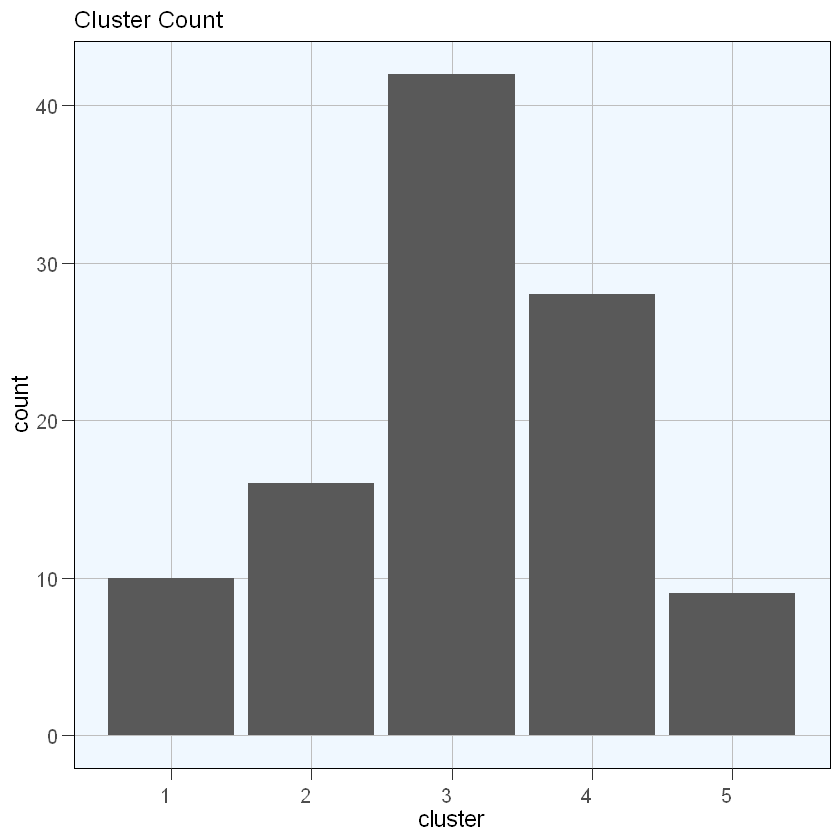

In [168]:
title = "Cluster Count"
filename = paste(chart_dir, "cluster_count", sep = "/")

ggplot(cluster_count, aes(x = cluster, y = count)) +
    geom_bar(stat = "identity") + 
    ggtitle(title) +
    my_theme() +
    theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust = 1))

ggsave(filename = paste(filename, ".svg", sep = ""))
ggsave(filename = paste(filename, ".png", sep = ""))

In [163]:
clusters %>%
    filter(lga == "ku-ring-gai") %>%
    pull(cluster)

[1] 3

**Ku-ring-gai** belongs to cluster three, which is the most numerous, at 42 counts.

# Ku-ring-gai Cluster

In [169]:
cluster <- 3
kuringgai_cluster <- data %>%
    filter(cluster == !!cluster)

head(kuringgai_cluster)
glimpse(kuringgai_cluster)

lga,crime_tot_per_lga,crime_rate_per_lga,sex,age,pop_age_lga,pop_total,birthplace_of_person,birth_value,industry of employment,emp_value,labour_type,labour_value,pop_dens_km2,seifa_value,num_service,cluster
blacktown,45643,0.1354464,Females,85 and over,2306,336982,New Zealand,35171,"Agriculture, Forestry and Fishing",0,employed,14,1449.8,995,248915,3
blacktown,45643,0.1354464,Females,85 and over,2306,336982,New Zealand,35171,"Agriculture, Forestry and Fishing",0,unemployed,2289,1449.8,995,248915,3
blacktown,45643,0.1354464,Females,85 and over,2306,336982,New Zealand,35171,Mining,0,employed,14,1449.8,995,248915,3
blacktown,45643,0.1354464,Females,85 and over,2306,336982,New Zealand,35171,Mining,0,unemployed,2289,1449.8,995,248915,3
blacktown,45643,0.1354464,Females,85 and over,2306,336982,New Zealand,35171,Manufacturing,0,employed,14,1449.8,995,248915,3
blacktown,45643,0.1354464,Females,85 and over,2306,336982,New Zealand,35171,Manufacturing,0,unemployed,2289,1449.8,995,248915,3


Observations: 6,861,600
Variables: 17
$ lga                      <chr> "blacktown", "blacktown", "blacktown", "bl...
$ crime_tot_per_lga        <dbl> 45643, 45643, 45643, 45643, 45643, 45643, ...
$ crime_rate_per_lga       <dbl> 0.1354464, 0.1354464, 0.1354464, 0.1354464...
$ sex                      <chr> "Females", "Females", "Females", "Females"...
$ age                      <chr> "85 and over", "85 and over", "85 and over...
$ pop_age_lga              <dbl> 2306, 2306, 2306, 2306, 2306, 2306, 2306, ...
$ pop_total                <dbl> 336982, 336982, 336982, 336982, 336982, 33...
$ birthplace_of_person     <chr> "New Zealand", "New Zealand", "New Zealand...
$ birth_value              <dbl> 35171, 35171, 35171, 35171, 35171, 35171, ...
$ `industry of employment` <chr> "Agriculture, Forestry and Fishing", "Agri...
$ emp_value                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ labour_type              <chr> "employed", "unemployed", "employed", "une...
$ labour_value

## Population Density Distribution in the Ku-ring-gai Cluster

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


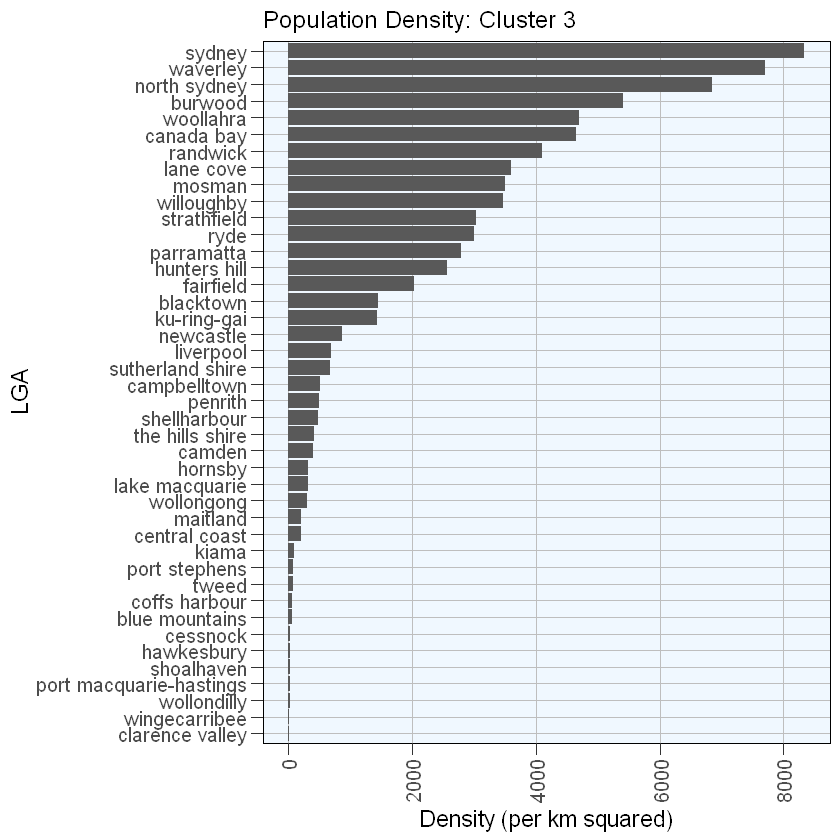

In [171]:
title = paste("Population Density: Cluster ", cluster, sep = "")
type = "bar"
x_lab = "LGA"
y_lab = "Density (per km squared)"
x_var = "lga"
y_var = "pop_dens_km2"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

kuringgai_cluster %>%
    dplyr::select(!!sym(x_var), !!sym(y_var)) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        my_theme()

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

There is a wide difference in the population density within the cluster.

## Transport Distribution in the Ku-ring-gai Cluster (cluster 3)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


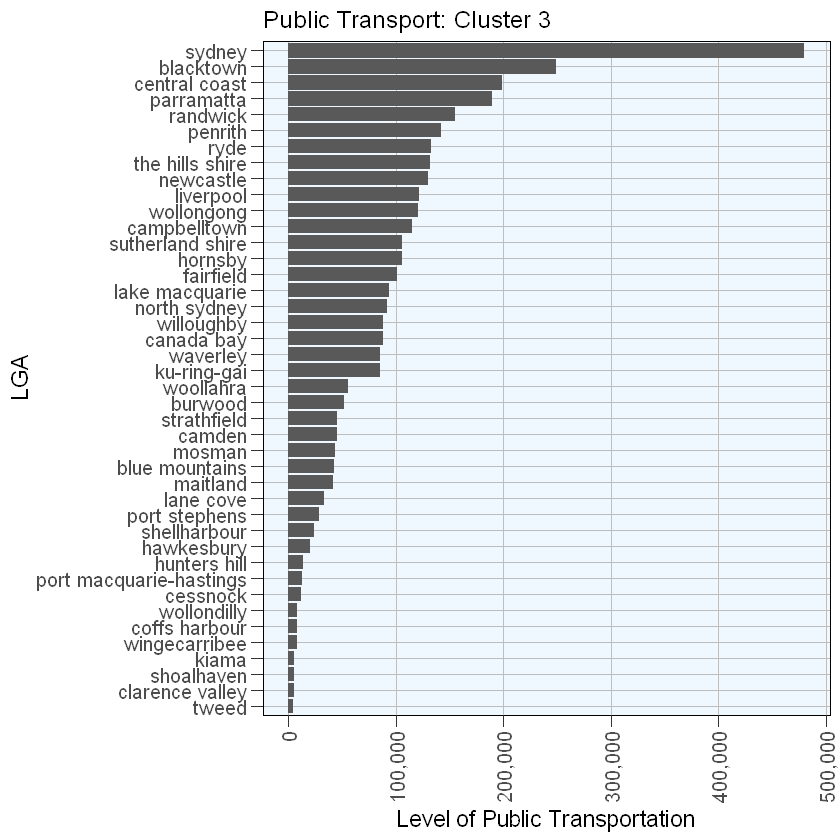

In [172]:
title = paste("Public Transport: Cluster ", cluster, sep = "")
type = "bar"
x_lab = "LGA"
y_lab = "Level of Public Transportation"
x_var = "lga"
y_var = "num_service"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

kuringgai_cluster %>%
    dplyr::select(!!sym(x_var), !!sym(y_var)) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        scale_y_continuous(labels = scales::comma) +
        # to make the right x tick not get cut off
        theme(plot.margin = margin(1, 15, 1, 1)) +
        my_theme()

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

## SEIFA Distribution in the Ku-ring-gai Cluster

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


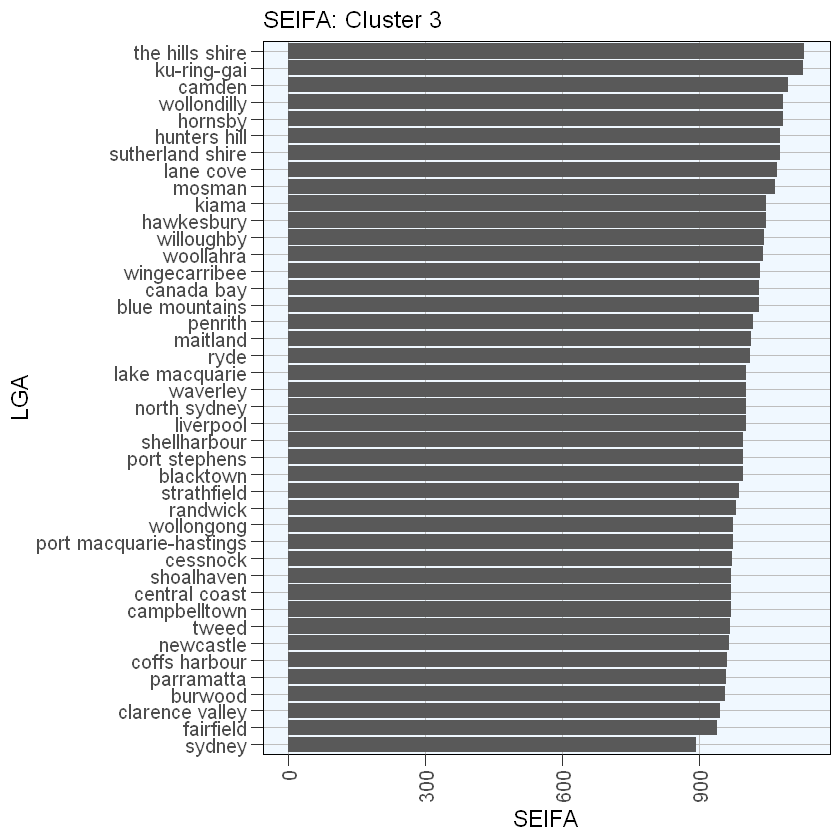

In [173]:
title = paste("SEIFA: Cluster ", cluster, sep = "")
type = "bar"
x_lab = "LGA"
y_lab = "SEIFA"
x_var = "lga"
y_var = "seifa_value"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

kuringgai_cluster %>%
    dplyr::select(!!sym(x_var), !!sym(y_var)) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        scale_y_continuous(labels = scales::comma) +
        # to make the right x tick not get cut off
        theme(plot.margin = margin(1, 15, 1, 1)) +
        my_theme()

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

# Cluster 4

In [174]:
cluster <- 4
cluster_4 <- data %>%
    filter(cluster == !!cluster)

head(cluster_4)
glimpse(cluster_4)

lga,crime_tot_per_lga,crime_rate_per_lga,sex,age,pop_age_lga,pop_total,birthplace_of_person,birth_value,industry of employment,emp_value,labour_type,labour_value,pop_dens_km2,seifa_value,num_service,cluster
balranald,192,0.08376963,Females,85 and over,24,2292,New Zealand,45,"Agriculture, Forestry and Fishing",0,employed,0,0.1,969,4,4
balranald,192,0.08376963,Females,85 and over,24,2292,New Zealand,45,"Agriculture, Forestry and Fishing",0,unemployed,21,0.1,969,4,4
balranald,192,0.08376963,Females,85 and over,24,2292,New Zealand,45,Mining,0,employed,0,0.1,969,4,4
balranald,192,0.08376963,Females,85 and over,24,2292,New Zealand,45,Mining,0,unemployed,21,0.1,969,4,4
balranald,192,0.08376963,Females,85 and over,24,2292,New Zealand,45,Manufacturing,0,employed,0,0.1,969,4,4
balranald,192,0.08376963,Females,85 and over,24,2292,New Zealand,45,Manufacturing,0,unemployed,21,0.1,969,4,4


Observations: 548,640
Variables: 17
$ lga                      <chr> "balranald", "balranald", "balranald", "ba...
$ crime_tot_per_lga        <dbl> 192, 192, 192, 192, 192, 192, 192, 192, 19...
$ crime_rate_per_lga       <dbl> 0.08376963, 0.08376963, 0.08376963, 0.0837...
$ sex                      <chr> "Females", "Females", "Females", "Females"...
$ age                      <chr> "85 and over", "85 and over", "85 and over...
$ pop_age_lga              <dbl> 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24...
$ pop_total                <dbl> 2292, 2292, 2292, 2292, 2292, 2292, 2292, ...
$ birthplace_of_person     <chr> "New Zealand", "New Zealand", "New Zealand...
$ birth_value              <dbl> 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45...
$ `industry of employment` <chr> "Agriculture, Forestry and Fishing", "Agri...
$ emp_value                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ labour_type              <chr> "employed", "unemployed", "employed", "une...
$ labour_value  

## Population Density Distribution in the Cluster 4

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


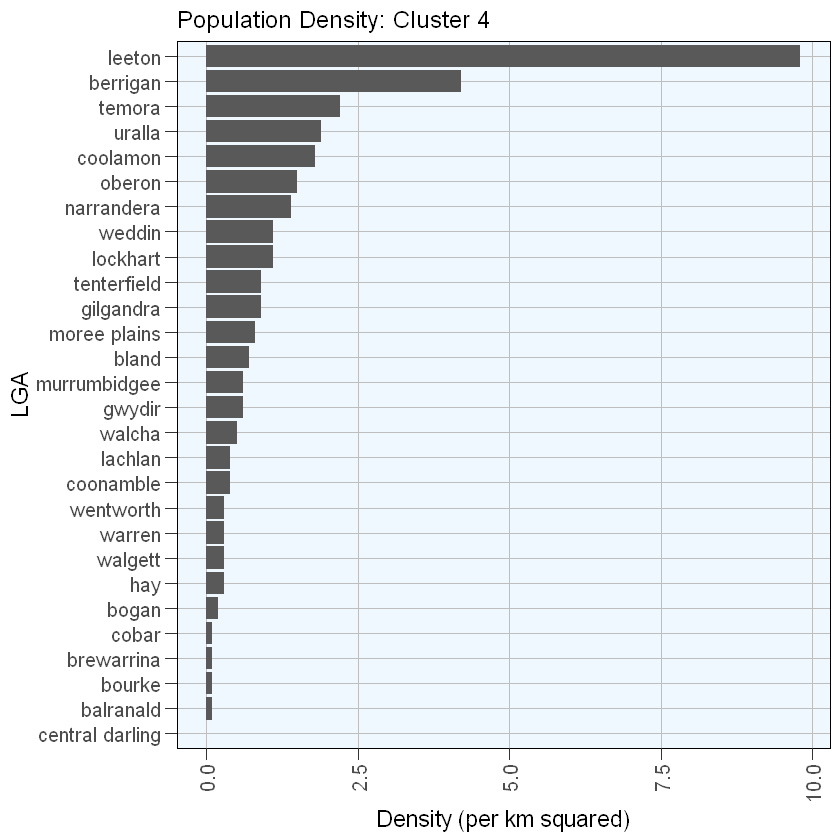

In [175]:
title = paste("Population Density: Cluster ", cluster, sep = "")
type = "bar"
x_lab = "LGA"
y_lab = "Density (per km squared)"
x_var = "lga"
y_var = "pop_dens_km2"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

cluster_4 %>%
    dplyr::select(!!sym(x_var), !!sym(y_var)) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        my_theme()

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

There is a wide difference in the population density within the cluster.

## Transport Distribution in the Cluster 4

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


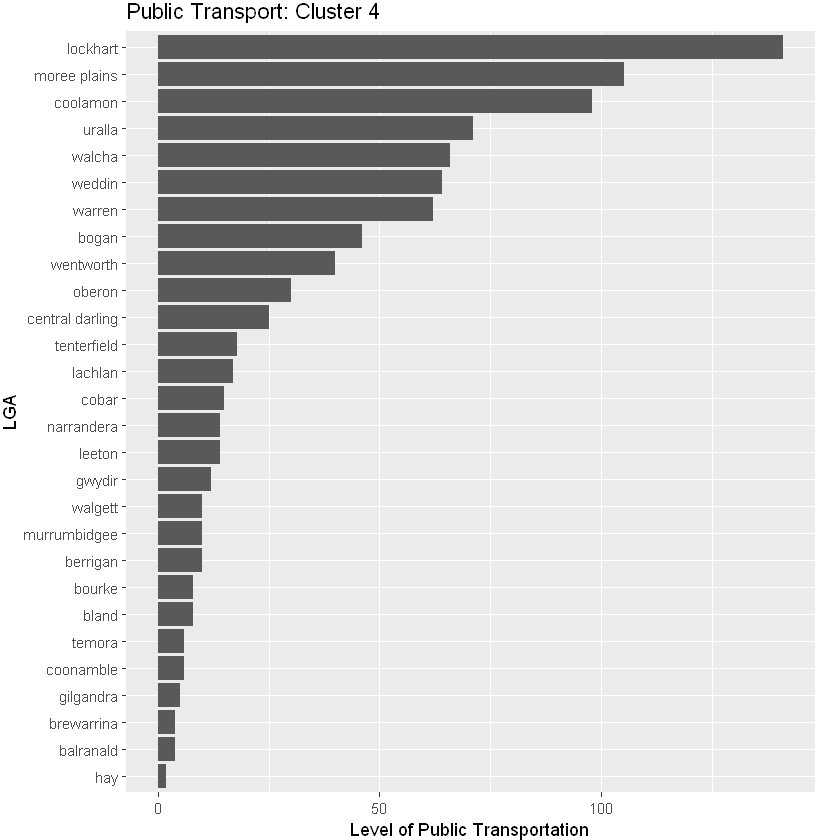

In [176]:
title = paste("Public Transport: Cluster ", cluster, sep = "")
type = "bar"
x_lab = "LGA"
y_lab = "Level of Public Transportation"
x_var = "lga"
y_var = "num_service"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

cluster_4 %>%
    dplyr::select(!!sym(x_var), !!sym(y_var)) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        scale_y_continuous(labels = scales::comma) +
        # to make the right x tick not get cut off
        theme(plot.margin = margin(1, 15, 1, 1))

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

## SEIFA Distribution in the Cluster 4

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


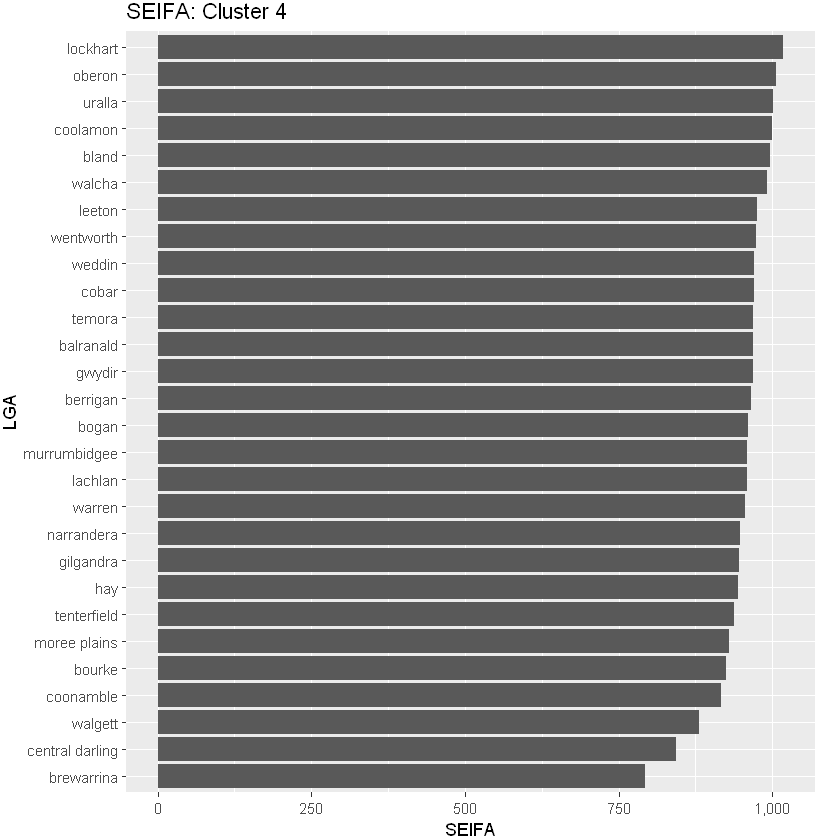

In [177]:
title = paste("SEIFA: Cluster ", cluster, sep = "")
type = "bar"
x_lab = "LGA"
y_lab = "SEIFA"
x_var = "lga"
y_var = "seifa_value"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

cluster_4 %>%
    dplyr::select(!!sym(x_var), !!sym(y_var)) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        scale_y_continuous(labels = scales::comma) +
        # to make the right x tick not get cut off
        theme(plot.margin = margin(1, 15, 1, 1))

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

# Facetting by Cluster

## Population Density For All Clusters

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


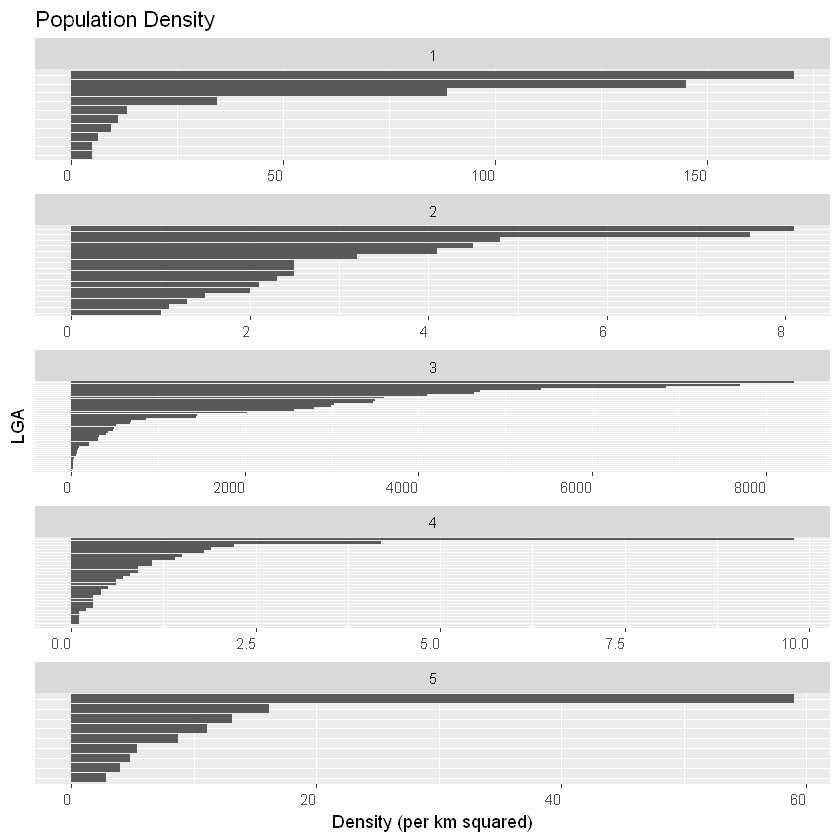

In [182]:
title = "Population Density"
type = "facet_bar"
x_lab = "LGA"
y_lab = "Density (per km squared)"
x_var = "lga"
y_var = "pop_dens_km2"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

data %>%
    dplyr::select(!!sym(x_var), !!sym(y_var), cluster) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        # remove the x labels
        theme(axis.text.y = element_blank(),
              axis.ticks.y = element_blank(),
              axis.text.x = element_text(angle = 0, hjust = 1)) +
        facet_wrap(cluster ~ ., nrow = n_clusters, scales = "free")
        

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

There is a wide difference in the population density within the cluster.

## Transport Distribution For All Clusters

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


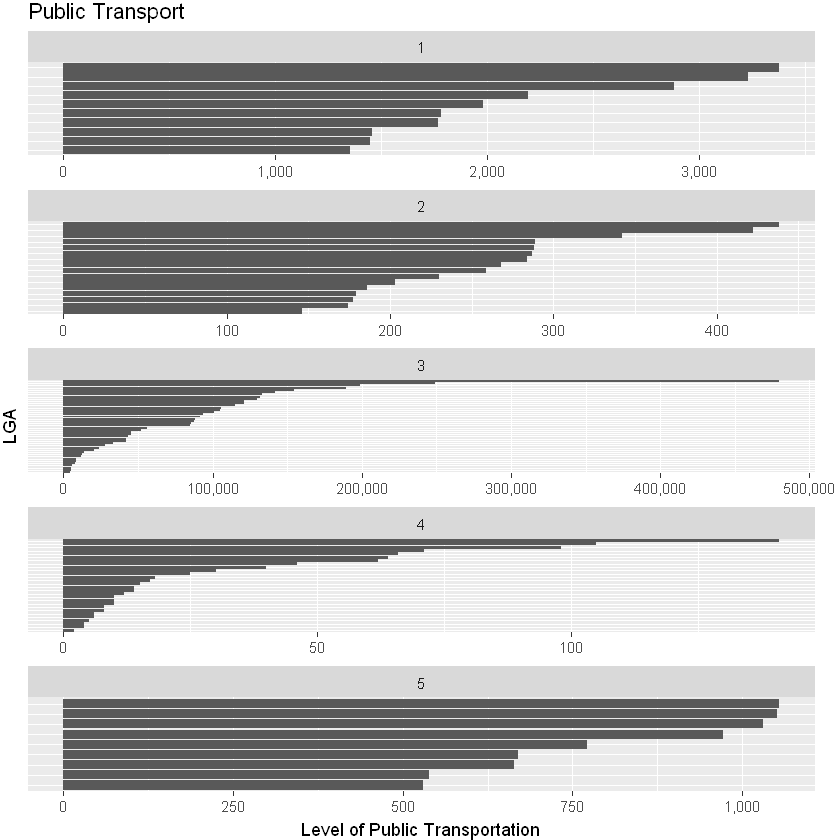

In [181]:
title = "Public Transport"
type = "facet_bar"
x_lab = "LGA"
y_lab = "Level of Public Transportation"
x_var = "lga"
y_var = "num_service"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

data %>%
    dplyr::select(!!sym(x_var), !!sym(y_var), cluster) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        # remove the x labels
        theme(axis.text.y = element_blank(),
              axis.ticks.y = element_blank(),
              plot.margin = margin(1, 15, 1, 1)) +
        scale_y_continuous(labels = scales::comma) +
        facet_wrap(cluster ~ ., nrow = n_clusters, scales = "free")
        

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

## SEIFA Distribution in the Cluster 4

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


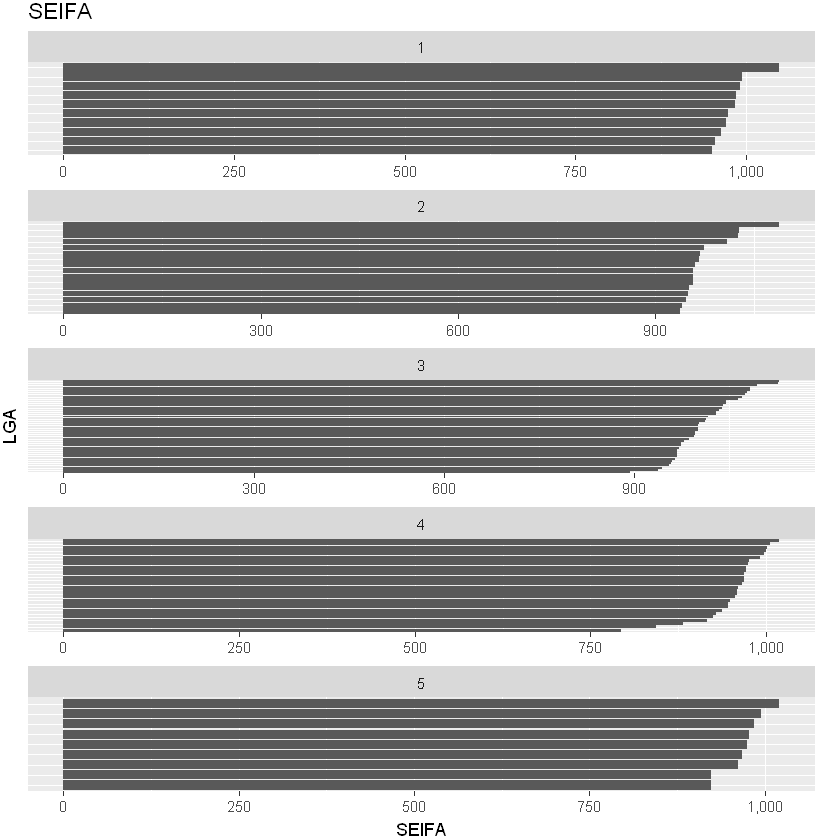

In [183]:
title = "SEIFA"
type = "facet_bar"
x_lab = "LGA"
y_lab = "SEIFA"
x_var = "lga"
y_var = "seifa_value"

filename = paste(type, y_var, "vs", x_var, "cluster", cluster, sep = "_")

data %>%
    dplyr::select(!!sym(x_var), !!sym(y_var), cluster) %>%
    distinct %>%
    ggplot(aes(x = reorder(!!sym(x_var), !!sym(y_var)), y = !!sym(y_var))) + 
        geom_bar(stat = "identity") +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title) +
        #theme(axis.text.x = element_text(angle = 90, hjust = 1))
        coord_flip() +
        # remove the x labels
        theme(axis.text.y = element_blank(),
              axis.ticks.y = element_blank(),
              plot.margin = margin(1, 15, 1, 1)) +
        scale_y_continuous(labels = scales::comma) +
        facet_wrap(cluster ~ ., nrow = n_clusters, scales = "free")
        

ggsave(paste(chart_dir, paste(filename, ".png", sep = ""), sep = "/"))
ggsave(paste(chart_dir, paste(filename, ".svg", sep = ""), sep = "/"))

# Modelling

In [184]:
data_model <- readr::read_csv(paste(data_path, "unified4_spread.csv", sep = "/"))

head(data_model)
glimpse(data_model)

Parsed with column specification:
cols(
  .default = col_double(),
  LGA = col_character(),
  Age = col_character()
)
See spec(...) for full column specifications.


LGA,crime_tot_per_lga,crime_rate_per_lga,Age,pop_total,Pop_Dens_km2,seifa_value,num_service,female_lga_age,male_lga_age,...,female_lga_perc,male_lga_perc,employed_lga_age,unemployed_lga_age,employed_lga_age_perc,unemployed_lga_age_perc,employed_lga,unemployed_lga,employed_lga_perc,unemployed_lga_perc
albury,6233,0.1220219,85 and over,51081,170.5,964,1769,845,489,...,0.4249525,0.3869541,3,1316,5.873025e-05,0.02576300,22913,18546,0.4485621,0.3630704
albury,6233,0.1220219,75 - 84,51081,170.5,964,1769,1658,1247,...,0.4249525,0.3869541,90,2832,1.761908e-03,0.05544136,22913,18546,0.4485621,0.3630704
albury,6233,0.1220219,65 - 74,51081,170.5,964,1769,2572,2335,...,0.4249525,0.3869541,882,4025,1.726669e-02,0.07879642,22913,18546,0.4485621,0.3630704
albury,6233,0.1220219,55 - 64,51081,170.5,964,1769,3324,3051,...,0.4249525,0.3869541,3832,2540,7.501811e-02,0.04972495,22913,18546,0.4485621,0.3630704
albury,6233,0.1220219,45 - 54,51081,170.5,964,1769,3331,3169,...,0.4249525,0.3869541,4826,1681,9.447740e-02,0.03290852,22913,18546,0.4485621,0.3630704
albury,6233,0.1220219,35 - 44,51081,170.5,964,1769,3231,2974,...,0.4249525,0.3869541,4619,1580,9.042501e-02,0.03093127,22913,18546,0.4485621,0.3630704


Observations: 1,125
Variables: 24
$ LGA                     <chr> "albury", "albury", "albury", "albury", "al...
$ crime_tot_per_lga       <dbl> 6233, 6233, 6233, 6233, 6233, 6233, 6233, 6...
$ crime_rate_per_lga      <dbl> 0.12202189, 0.12202189, 0.12202189, 0.12202...
$ Age                     <chr> "85 and over", "75 - 84", "65 - 74", "55 - ...
$ pop_total               <dbl> 51081, 51081, 51081, 51081, 51081, 51081, 5...
$ Pop_Dens_km2            <dbl> 170.5, 170.5, 170.5, 170.5, 170.5, 170.5, 1...
$ seifa_value             <dbl> 964, 964, 964, 964, 964, 964, 964, 964, 964...
$ num_service             <dbl> 1769, 1769, 1769, 1769, 1769, 1769, 1769, 1...
$ female_lga_age          <dbl> 845, 1658, 2572, 3324, 3331, 3231, 3301, 18...
$ male_lga_age            <dbl> 489, 1247, 2335, 3051, 3169, 2974, 3195, 16...
$ male_lga                <dbl> 19766, 19766, 19766, 19766, 19766, 19766, 1...
$ female_lga              <dbl> 21707, 21707, 21707, 21707, 21707, 21707, 2...
$ female_lga_age_p

Exclude some variables for modelling.

In [185]:
names(data_model) %<>% tolower

## Join the Cluster Data

In [186]:
data_model %<>%
    inner_join(clusters, by = "lga")

head(data_model)
glimpse(data_model)

lga,crime_tot_per_lga,crime_rate_per_lga,age,pop_total,pop_dens_km2,seifa_value,num_service,female_lga_age,male_lga_age,...,male_lga_perc,employed_lga_age,unemployed_lga_age,employed_lga_age_perc,unemployed_lga_age_perc,employed_lga,unemployed_lga,employed_lga_perc,unemployed_lga_perc,cluster
albury,6233,0.1220219,85 and over,51081,170.5,964,1769,845,489,...,0.3869541,3,1316,5.873025e-05,0.02576300,22913,18546,0.4485621,0.3630704,1
albury,6233,0.1220219,75 - 84,51081,170.5,964,1769,1658,1247,...,0.3869541,90,2832,1.761908e-03,0.05544136,22913,18546,0.4485621,0.3630704,1
albury,6233,0.1220219,65 - 74,51081,170.5,964,1769,2572,2335,...,0.3869541,882,4025,1.726669e-02,0.07879642,22913,18546,0.4485621,0.3630704,1
albury,6233,0.1220219,55 - 64,51081,170.5,964,1769,3324,3051,...,0.3869541,3832,2540,7.501811e-02,0.04972495,22913,18546,0.4485621,0.3630704,1
albury,6233,0.1220219,45 - 54,51081,170.5,964,1769,3331,3169,...,0.3869541,4826,1681,9.447740e-02,0.03290852,22913,18546,0.4485621,0.3630704,1
albury,6233,0.1220219,35 - 44,51081,170.5,964,1769,3231,2974,...,0.3869541,4619,1580,9.042501e-02,0.03093127,22913,18546,0.4485621,0.3630704,1


Observations: 945
Variables: 25
$ lga                     <chr> "albury", "albury", "albury", "albury", "al...
$ crime_tot_per_lga       <dbl> 6233, 6233, 6233, 6233, 6233, 6233, 6233, 6...
$ crime_rate_per_lga      <dbl> 0.12202189, 0.12202189, 0.12202189, 0.12202...
$ age                     <chr> "85 and over", "75 - 84", "65 - 74", "55 - ...
$ pop_total               <dbl> 51081, 51081, 51081, 51081, 51081, 51081, 5...
$ pop_dens_km2            <dbl> 170.5, 170.5, 170.5, 170.5, 170.5, 170.5, 1...
$ seifa_value             <dbl> 964, 964, 964, 964, 964, 964, 964, 964, 964...
$ num_service             <dbl> 1769, 1769, 1769, 1769, 1769, 1769, 1769, 1...
$ female_lga_age          <dbl> 845, 1658, 2572, 3324, 3331, 3231, 3301, 18...
$ male_lga_age            <dbl> 489, 1247, 2335, 3051, 3169, 2974, 3195, 16...
$ male_lga                <dbl> 19766, 19766, 19766, 19766, 19766, 19766, 1...
$ female_lga              <dbl> 21707, 21707, 21707, 21707, 21707, 21707, 2...
$ female_lga_age_per

In [187]:
columns_containing_age <- names(data_model)[grepl("age", names(data_model))]
columns_containing_age

[1] "age"                     "female_lga_age"         
[3] "male_lga_age"            "female_lga_age_perc"    
[5] "male_lga_age_perc"       "employed_lga_age"       
[7] "unemployed_lga_age"      "employed_lga_age_perc"  
[9] "unemployed_lga_age_perc"

In [188]:
data_model %<>%
    dplyr::select(-columns_containing_age) %>%
    distinct

head(data_model)
glimpse(data_model)

lga,crime_tot_per_lga,crime_rate_per_lga,pop_total,pop_dens_km2,seifa_value,num_service,male_lga,female_lga,female_lga_perc,male_lga_perc,employed_lga,unemployed_lga,employed_lga_perc,unemployed_lga_perc,cluster
albury,6233,0.12202189,51081,170.5,964,1769,19766,21707,0.4249525,0.3869541,22913,18546,0.4485621,0.3630704,1
ballina,2690,0.06439412,41774,88.7,986,1353,16488,18355,0.4393881,0.3946953,17483,17354,0.4185139,0.4154259,1
balranald,192,0.08376963,2292,0.1,969,4,926,877,0.3826353,0.4040140,990,807,0.4319372,0.3520942,4
bathurst regional,4027,0.09751314,41297,11.1,994,2882,16466,16712,0.4046783,0.3987215,18160,14999,0.4397414,0.3631983,1
bega valley,2119,0.06376960,33229,5.4,974,771,13543,14433,0.4343495,0.4075657,13180,14829,0.3966415,0.4462668,5
bellingen,798,0.06305310,12656,8.1,957,422,5018,5437,0.4295986,0.3964918,4871,5553,0.3848767,0.4387642,2


Observations: 105
Variables: 16
$ lga                 <chr> "albury", "ballina", "balranald", "bathurst reg...
$ crime_tot_per_lga   <dbl> 6233, 2690, 192, 4027, 2119, 798, 482, 45643, 3...
$ crime_rate_per_lga  <dbl> 0.12202189, 0.06439412, 0.08376963, 0.09751314,...
$ pop_total           <dbl> 51081, 41774, 2292, 41297, 33229, 12656, 8456, ...
$ pop_dens_km2        <dbl> 170.5, 88.7, 0.1, 11.1, 5.4, 8.1, 4.2, 1449.8, ...
$ seifa_value         <dbl> 964, 986, 969, 994, 974, 957, 965, 995, 997, 10...
$ num_service         <dbl> 1769, 1353, 4, 2882, 771, 422, 10, 248915, 8, 2...
$ male_lga            <dbl> 19766, 16488, 926, 16466, 13543, 5018, 3498, 12...
$ female_lga          <dbl> 21707, 18355, 877, 16712, 14433, 5437, 3518, 13...
$ female_lga_perc     <dbl> 0.4249525, 0.4393881, 0.3826353, 0.4046783, 0.4...
$ male_lga_perc       <dbl> 0.3869541, 0.3946953, 0.4040140, 0.3987215, 0.4...
$ employed_lga        <dbl> 22913, 17483, 990, 18160, 13180, 4871, 3288, 15...
$ unemployed_lga    

# Full Set Regression

In [228]:
data_model_2 <- data_model %>%
    dplyr::select(-lga, -cluster)

## Poisson Regression on the full set


Call:
glm(formula = crime_tot_per_lga ~ ., family = poisson, data = data_model_2, 
    offset = log(pop_total))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-28.0915   -4.5384   -0.3036    3.6716   21.8784  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.617e+00  1.607e-01  16.291  < 2e-16 ***
crime_rate_per_lga   5.020e+00  4.132e-02 121.511  < 2e-16 ***
pop_total            7.054e-06  6.099e-07  11.566  < 2e-16 ***
pop_dens_km2        -4.990e-05  1.837e-06 -27.170  < 2e-16 ***
seifa_value         -5.629e-03  6.728e-05 -83.669  < 2e-16 ***
num_service         -4.698e-07  6.976e-08  -6.735 1.64e-11 ***
male_lga             2.717e-04  9.207e-06  29.510  < 2e-16 ***
female_lga           2.513e-04  9.667e-06  25.991  < 2e-16 ***
female_lga_perc     -1.470e+01  5.909e-01 -24.877  < 2e-16 ***
male_lga_perc       -1.457e+01  5.847e-01 -24.926  < 2e-16 ***
employed_lga        -2.671e-04  9.303e-06 -28.714  < 2e

[1] "The five-percent critical value for a chi-squared with 91 degrees of freedom is 114.267867677194"



	Overdispersion test

data:  model
z = 5.0478, p-value = 2.235e-07
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
  61.28459 


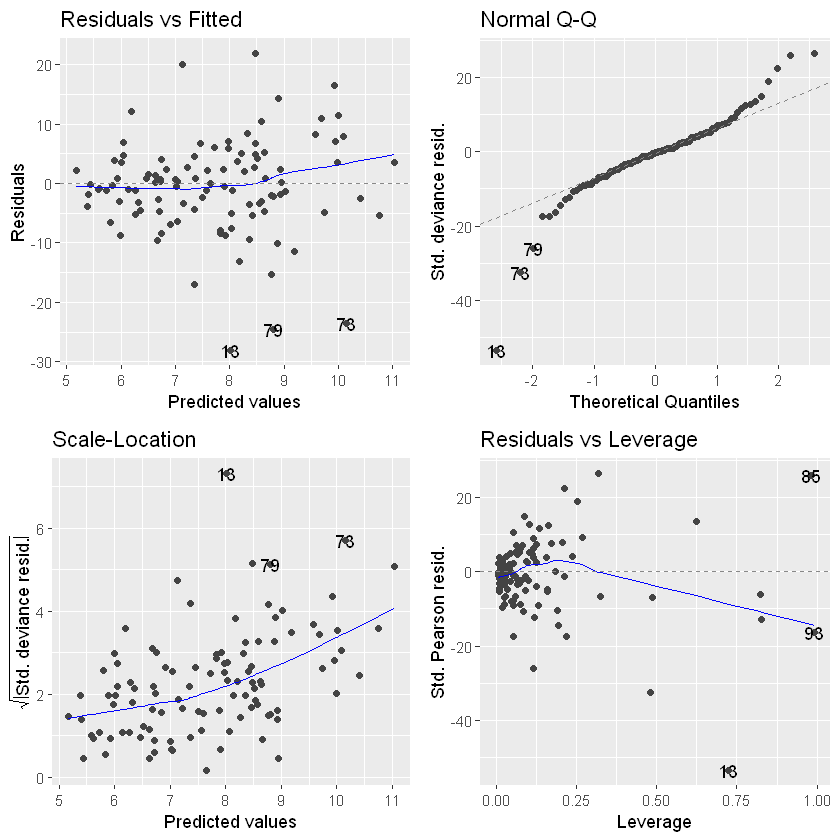

In [241]:
model <- glm(crime_tot_per_lga ~., 
             offset = log(pop_total), 
             family = poisson, 
             data = data_model_2)

summary(model)
# The five-percent critical value for a chi-squared with __ degrees of freedom
print(paste("The five-percent critical value for a chi-squared with", model$df.residual, "degrees of freedom is", qchisq(0.95, model$df.residual)))
dispersiontest(model)
autoplot(model)

## Quasi-Poisson Regression on the full set


Call:
glm(formula = crime_tot_per_lga ~ ., family = quasipoisson, data = data_model_2, 
    offset = log(pop_total))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-28.0915   -4.5384   -0.3036    3.6716   21.8784  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.617e+00  1.351e+00   1.937 0.055785 .  
crime_rate_per_lga   5.020e+00  3.474e-01  14.451  < 2e-16 ***
pop_total            7.054e-06  5.128e-06   1.376 0.172349    
pop_dens_km2        -4.990e-05  1.544e-05  -3.231 0.001716 ** 
seifa_value         -5.629e-03  5.657e-04  -9.951 3.23e-16 ***
num_service         -4.698e-07  5.866e-07  -0.801 0.425213    
male_lga             2.717e-04  7.741e-05   3.510 0.000700 ***
female_lga           2.513e-04  8.128e-05   3.091 0.002646 ** 
female_lga_perc     -1.470e+01  4.968e+00  -2.959 0.003938 ** 
male_lga_perc       -1.457e+01  4.916e+00  -2.964 0.003871 ** 
employed_lga        -2.671e-04  7.822e-05  -3.415 

[1] "The five-percent critical value for a chi-squared with 91 degrees of freedom is 114.267867677194"


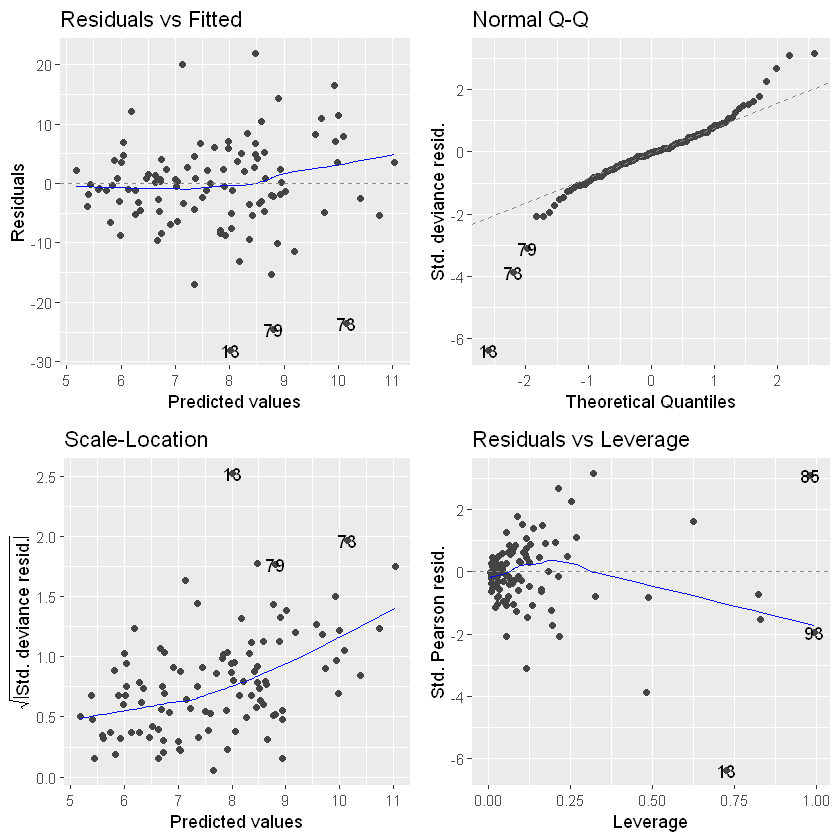

In [237]:
model <- glm(crime_tot_per_lga ~., 
             offset = log(pop_total), 
             family = quasipoisson, 
             data = data_model_2)

summary(model)
# The five-percent critical value for a chi-squared with __ degrees of freedom
print(paste("The five-percent critical value for a chi-squared with", model$df.residual, "degrees of freedom is", qchisq(0.95, model$df.residual)))
autoplot(model)

## Negative Binomial Regression on the full set


Call:
glm.nb(formula = crime_tot_per_lga ~ ., data = data_model_2, 
    init.theta = 3.651906423, link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.13470  -0.95454  -0.09984   0.65881   2.15874  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          7.942e+00  4.053e+00   1.959 0.050076 .  
crime_rate_per_lga   4.523e+00  1.050e+00   4.307 1.66e-05 ***
pop_total           -3.541e-05  2.685e-05  -1.319 0.187298    
pop_dens_km2         1.585e-04  6.481e-05   2.446 0.014449 *  
seifa_value         -9.875e-04  2.041e-03  -0.484 0.628455    
num_service         -1.616e-05  3.571e-06  -4.525 6.04e-06 ***
male_lga             1.011e-03  2.283e-04   4.429 9.49e-06 ***
female_lga           6.406e-04  2.469e-04   2.594 0.009489 ** 
female_lga_perc     -2.256e+01  9.742e+00  -2.315 0.020591 *  
male_lga_perc       -4.017e+01  9.364e+00  -4.290 1.79e-05 ***
employed_lga        -7.321e-04  2.317e-04  -3.160 0.00157

[1] "The five-percent critical value for a chi-squared with 91 degrees of freedom is 114.267867677194"


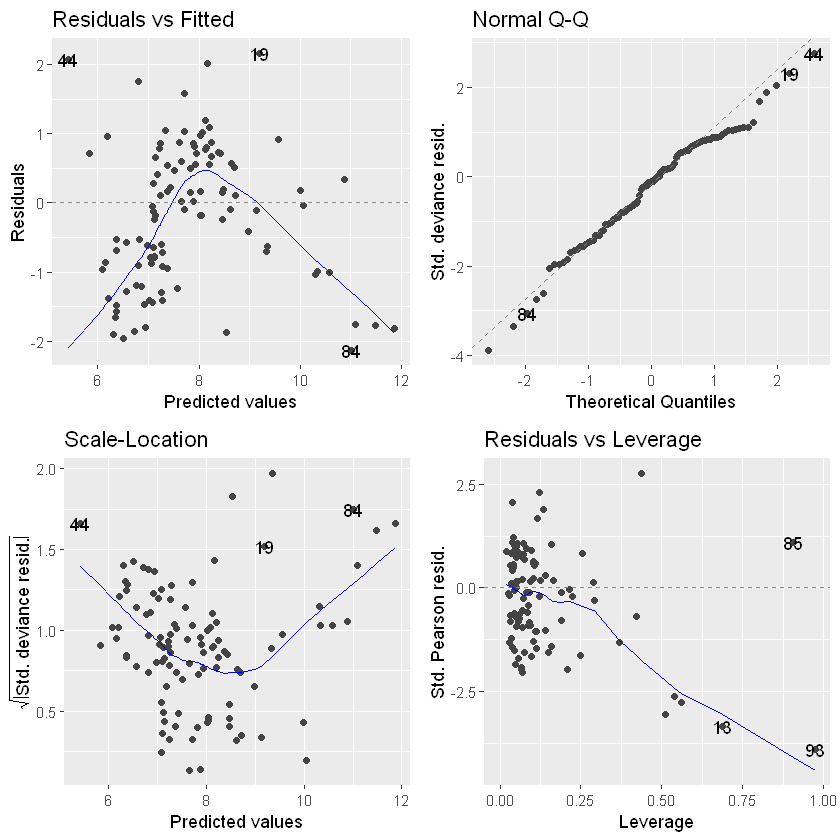

In [243]:
model <- glm.nb(crime_tot_per_lga ~., 
             data = data_model_2)

summary(model)
# The five-percent critical value for a chi-squared with __ degrees of freedom
print(paste("The five-percent critical value for a chi-squared with", model$df.residual, "degrees of freedom is", qchisq(0.95, model$df.residual)))
autoplot(model)

## Cluster 3 Poisson Regression

In [226]:
cluster_3 <- data_model %>%
    filter(cluster == 3) %>%
    dplyr::select(-lga, -cluster)

head(cluster_3)
glimpse(cluster_3)

crime_tot_per_lga,crime_rate_per_lga,pop_total,pop_dens_km2,seifa_value,num_service,male_lga,female_lga,female_lga_perc,male_lga_perc,employed_lga,unemployed_lga,employed_lga_perc,unemployed_lga_perc
45643,0.13544640,336982,1449.8,995,248915,128178,132137,0.3921189,0.3803705,151466,108839,0.4494780,0.3229816
4872,0.06335583,76899,55.1,1030,42057,29902,32932,0.4282500,0.3888477,35853,26993,0.4662349,0.3510189
3320,0.09016839,36820,5406.2,956,52222,15368,16653,0.4522814,0.4173819,17158,14814,0.4659967,0.4023357
4039,0.05164037,78214,399.3,1094,45334,28794,30722,0.3927941,0.3681438,40011,19494,0.5115580,0.2492393
25367,0.16158972,156984,518.0,969,114888,59603,63526,0.4046654,0.3796756,68865,54288,0.4386753,0.3458187
5140,0.05838852,88031,4644.5,1030,87730,35071,38667,0.4392430,0.3983937,44680,29020,0.5075485,0.3296566


Observations: 42
Variables: 14
$ crime_tot_per_lga   <dbl> 45643, 4872, 3320, 4039, 25367, 5140, 32475, 59...
$ crime_rate_per_lga  <dbl> 0.13544640, 0.06335583, 0.09016839, 0.05164037,...
$ pop_total           <dbl> 336982, 76899, 36820, 78214, 156984, 88031, 327...
$ pop_dens_km2        <dbl> 1449.8, 55.1, 5406.2, 399.3, 518.0, 4644.5, 200...
$ seifa_value         <dbl> 995, 1030, 956, 1094, 969, 1030, 969, 972, 945,...
$ num_service         <dbl> 248915, 42057, 52222, 45334, 114888, 87730, 198...
$ male_lga            <dbl> 128178, 29902, 15368, 28794, 59603, 35071, 1276...
$ female_lga          <dbl> 132137, 32932, 16653, 30722, 63526, 38667, 1397...
$ female_lga_perc     <dbl> 0.3921189, 0.4282500, 0.4522814, 0.3927941, 0.4...
$ male_lga_perc       <dbl> 0.3803705, 0.3888477, 0.4173819, 0.3681438, 0.3...
$ employed_lga        <dbl> 151466, 35853, 17158, 40011, 68865, 44680, 1395...
$ unemployed_lga      <dbl> 108839, 26993, 14814, 19494, 54288, 29020, 1276...
$ employed_lga_perc  


Call:
glm(formula = crime_tot_per_lga ~ ., family = poisson, data = cluster_3, 
    offset = log(pop_total))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-15.4126   -3.6860   -0.4609    3.5558   11.2557  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.284e-01  2.176e-01  -1.509  0.13127    
crime_rate_per_lga   9.314e+00  9.031e-02 103.129  < 2e-16 ***
pop_total            7.795e-06  7.533e-07  10.349  < 2e-16 ***
pop_dens_km2         2.658e-06  2.300e-06   1.156  0.24772    
seifa_value         -3.423e-03  9.304e-05 -36.794  < 2e-16 ***
num_service         -3.333e-06  9.048e-08 -36.831  < 2e-16 ***
male_lga             9.483e-04  1.168e-04   8.121 4.63e-16 ***
female_lga           9.502e-04  1.159e-04   8.198 2.45e-16 ***
female_lga_perc     -2.607e+01  9.108e+00  -2.862  0.00421 ** 
male_lga_perc       -2.345e+01  9.186e+00  -2.552  0.01070 *  
employed_lga        -9.550e-04  1.166e-04  -8.190 2.61e-16

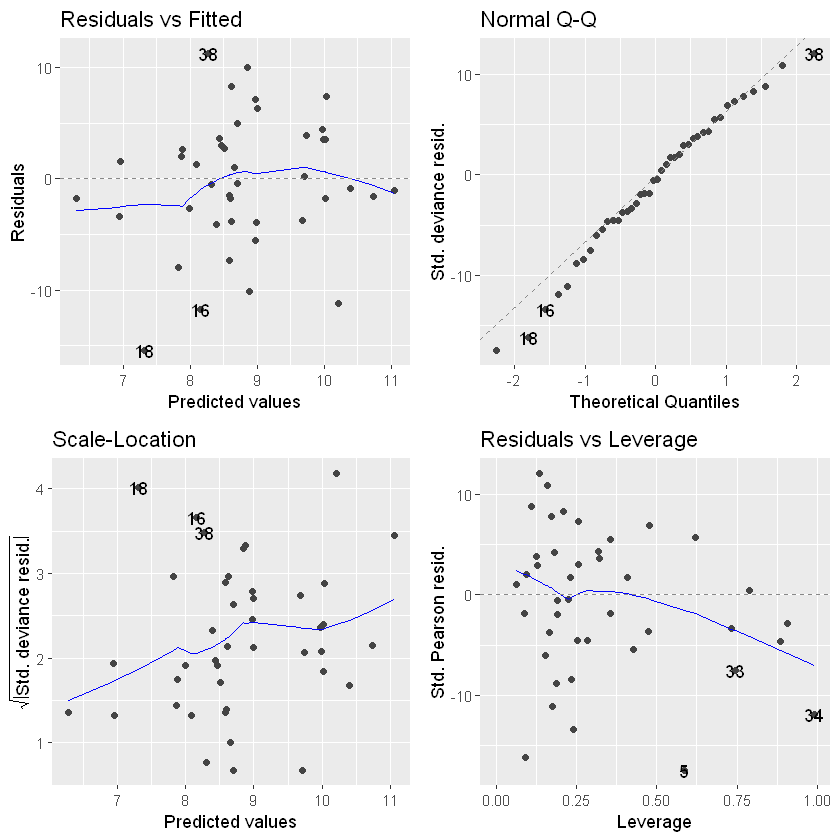

In [227]:
model <- glm(crime_tot_per_lga ~., offset = log(pop_total), family = poisson, data = cluster_3)

summary(model)
autoplot(model)

# Correlations

In [205]:
correlation_matrix <- data_model %>%
    dplyr::select(-lga, -cluster) %>%
    cor()


correlation_matrix_print <- correlation_matrix

correlation_matrix_print[lower.tri(correlation_matrix, diag = FALSE)] <- 0

correlation_matrix_print

,crime_tot_per_lga,crime_rate_per_lga,pop_total,pop_dens_km2,seifa_value,num_service,male_lga,female_lga,female_lga_perc,male_lga_perc,employed_lga,unemployed_lga,employed_lga_perc,unemployed_lga_perc
crime_tot_per_lga,1,0.1799817,0.85331519,0.36634118,-0.05574115,0.90217259,0.87774177,0.85621089,0.1875020,0.11117483,0.86588448,0.8497058,0.2852929,-0.15165114
crime_rate_per_lga,0,1.0000000,-0.05880183,-0.05676528,-0.61943421,0.07488728,-0.04210267,-0.05905993,-0.3225200,0.12461711,-0.05131925,-0.0495612,-0.3172114,0.18803770
pop_total,0,0.0000000,1.00000000,0.30227463,0.20435198,0.82313208,0.99730212,0.99875305,0.2506011,-0.14372733,0.99112690,0.9864222,0.3444699,-0.25293818
pop_dens_km2,0,0.0000000,0.00000000,1.00000000,0.13569647,0.61474212,0.33489277,0.32531817,0.5327030,0.21970526,0.36597913,0.2774621,0.6210650,-0.32632972
seifa_value,0,0.0000000,0.00000000,0.00000000,1.00000000,0.10199514,0.18144741,0.19912232,0.1865389,-0.42192315,0.23545380,0.1285134,0.6735699,-0.68115948
num_service,0,0.0000000,0.00000000,0.00000000,0.00000000,1.00000000,0.85392499,0.83420421,0.2967099,0.16415734,0.86877257,0.7947911,0.4928160,-0.29593902
male_lga,0,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.99844728,0.2679523,-0.09496526,0.99297527,0.9867037,0.3542594,-0.24128272
female_lga,0,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.2798588,-0.12576754,0.99185071,0.9882303,0.3549218,-0.24679037
female_lga_perc,0,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.0000000,-0.04796597,0.26592276,0.2792150,0.3395610,0.05053036
male_lga_perc,0,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,1.00000000,-0.11372358,-0.1036547,-0.1617591,0.44211818


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


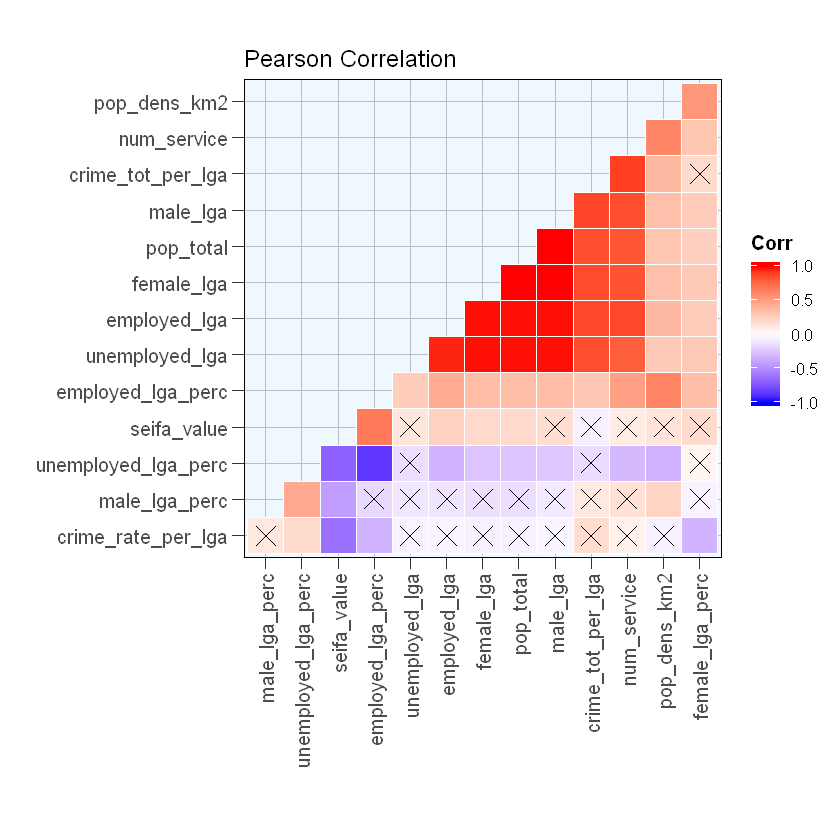

In [137]:
data_model %>%
    dplyr::select(-cluster) %>%
    cor() %>%
    ggcorrplot(hc.order = TRUE, 
               type = "lower", 
               outline.col = "white",
               #lab = TRUE,
               p.mat = p.mat) +
    ggtitle("Pearson Correlation") +
    my_theme() +
    xlab("") +
    ylab("")
    
ggsave(paste(chart_dir, "correlation.png", sep = "/"))
ggsave(paste(chart_dir, "correlation.svg", sep = "/"))

In [126]:
# Compute the correlation p-values
p.mat <- data_model %>%
    dplyr::select(-cluster) %>%
    cor_pmat()

In [193]:
p.mat.lower <- p.mat %>%
    lower.tri(diag = FALSE)

p.mat.print <- round(p.mat, 3)

p.mat.print[p.mat.lower] <- 0

p.mat.print

,crime_tot_per_lga,crime_rate_per_lga,pop_total,pop_dens_km2,seifa_value,num_service,male_lga,female_lga,female_lga_perc,male_lga_perc,employed_lga,unemployed_lga,employed_lga_perc,unemployed_lga_perc
crime_tot_per_lga,0,0.066,0.000,0.000,0.572,0.000,0.000,0.000,0.055,0.259,0.000,0.000,0.003,0.123
crime_rate_per_lga,0,0.000,0.551,0.565,0.000,0.448,0.670,0.550,0.001,0.205,0.603,0.616,0.001,0.055
pop_total,0,0.000,0.000,0.002,0.037,0.000,0.000,0.000,0.010,0.144,0.000,0.000,0.000,0.009
pop_dens_km2,0,0.000,0.000,0.000,0.168,0.000,0.000,0.001,0.000,0.024,0.000,0.004,0.000,0.001
seifa_value,0,0.000,0.000,0.000,0.000,0.301,0.064,0.042,0.057,0.000,0.016,0.191,0.000,0.000
num_service,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.094,0.000,0.000,0.000,0.002
male_lga,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.335,0.000,0.000,0.000,0.013
female_lga,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.201,0.000,0.000,0.000,0.011
female_lga_perc,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.627,0.006,0.004,0.000,0.609
male_lga_perc,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.248,0.293,0.099,0.000


## Crime Rate vs Unemployment

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


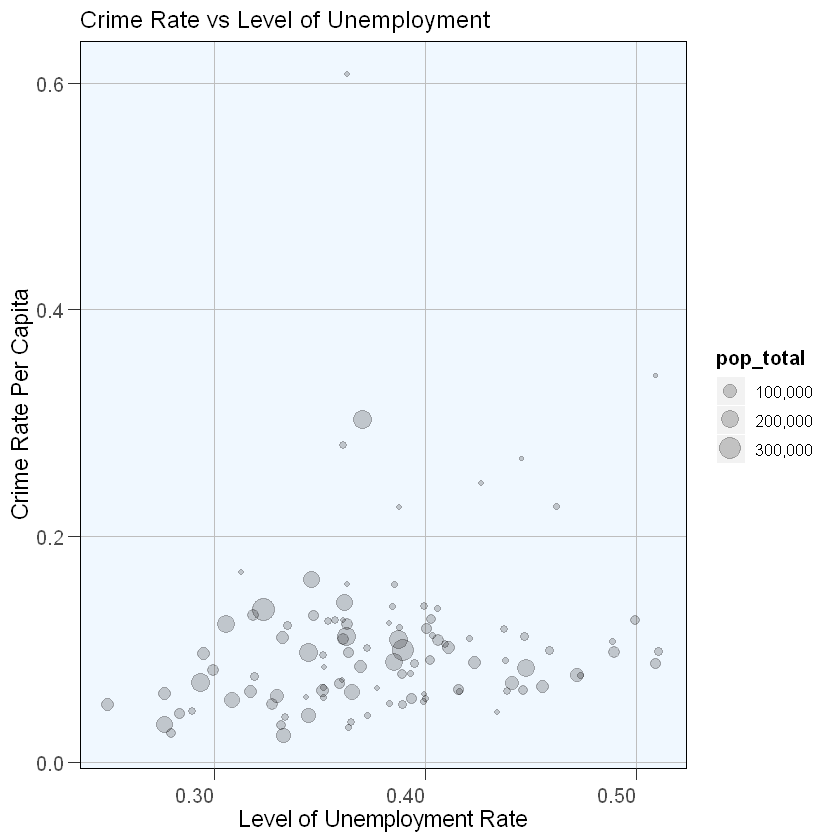

In [214]:
x_var = "unemployed_lga_perc"
y_var = "crime_rate_per_lga"
title = "Crime Rate vs Level of Unemployment"

ggplot(data_model, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) +
    scale_size_continuous(labels = scales::comma) +
    scale_x_continuous(labels = number_format(accuracy = 0.01)) +
    xlab("Level of Unemployment Rate") +
    ylab("Crime Rate Per Capita") +
    # label some points over a certain threshold
    #geom_text(aes(label = ifelse((!!sym(x_var) > 1.1) & (!!sym(y_var) > 0), as.character(lga), '')), hjust = 1.3, vjust = 0, size = 3) +
    #geom_text(aes(label = ifelse((!!sym(x_var) < 1) & (!!sym(y_var) > 0.2), as.character(lga), '')), hjust = -0.2, vjust = 0, size = 3) +
    ggtitle(title) +
    my_theme() +
    theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust = 1))

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(chart_dir, chart_name_svg, sep = "/")
filename_png = paste(chart_dir, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

## Crime Rate vs Female Percentage

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


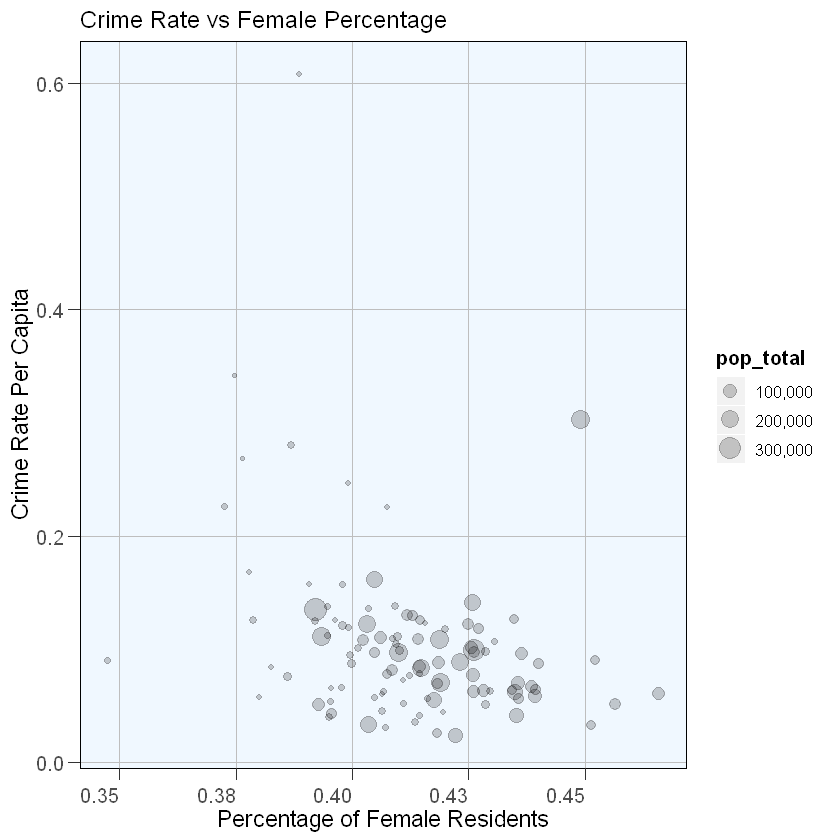

In [210]:
x_var = "female_lga_perc"
y_var = "crime_rate_per_lga"
title = "Crime Rate vs Female Percentage"

ggplot(data_model, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) +
    scale_size_continuous(labels = scales::comma) +
    scale_x_continuous(labels = number_format(accuracy = 0.01)) +
    xlab("Percentage of Female Residents") +
    ylab("Crime Rate Per Capita") +
    # label some points over a certain threshold
    #geom_text(aes(label = ifelse((!!sym(x_var) > 1.1) & (!!sym(y_var) > 0), as.character(lga), '')), hjust = 1.3, vjust = 0, size = 3) +
    #geom_text(aes(label = ifelse((!!sym(x_var) < 1) & (!!sym(y_var) > 0.2), as.character(lga), '')), hjust = -0.2, vjust = 0, size = 3) +
    ggtitle(title) +
    my_theme() +
    theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust = 1))

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(chart_dir, chart_name_svg, sep = "/")
filename_png = paste(chart_dir, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

## Crime Rate vs Employment

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


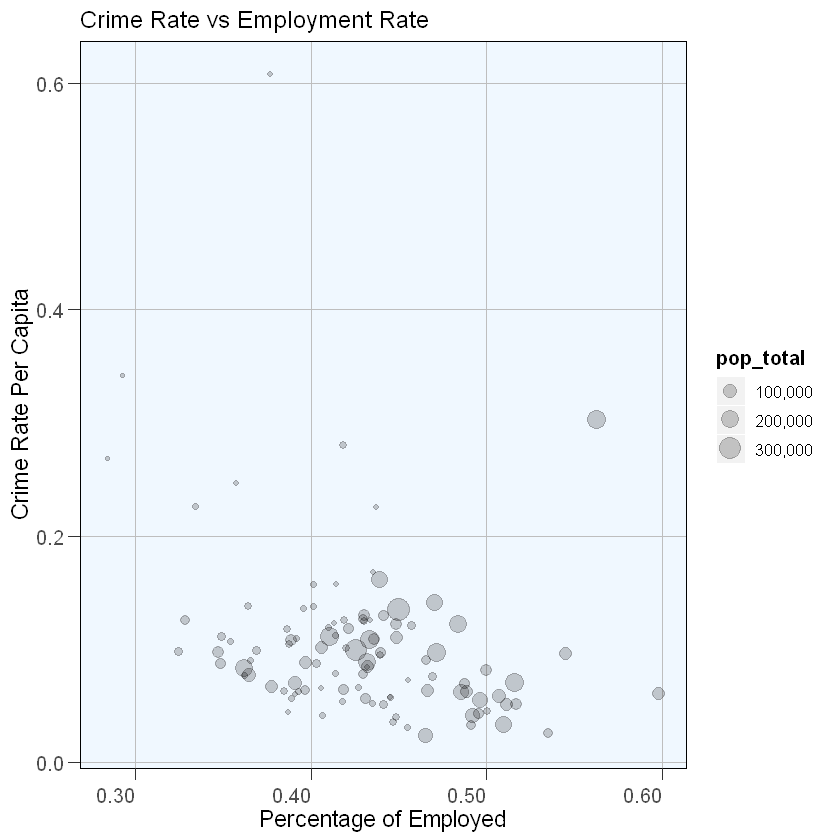

In [211]:
x_var = "employed_lga_perc"
y_var = "crime_rate_per_lga"
title = "Crime Rate vs Employment Rate"

ggplot(data_model, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) +
    scale_size_continuous(labels = scales::comma) +
    scale_x_continuous(labels = number_format(accuracy = 0.01)) +
    xlab("Percentage of Employed") +
    ylab("Crime Rate Per Capita") +
    # label some points over a certain threshold
    #geom_text(aes(label = ifelse((!!sym(x_var) > 1.1) & (!!sym(y_var) > 0), as.character(lga), '')), hjust = 1.3, vjust = 0, size = 3) +
    #geom_text(aes(label = ifelse((!!sym(x_var) < 1) & (!!sym(y_var) > 0.2), as.character(lga), '')), hjust = -0.2, vjust = 0, size = 3) +
    ggtitle(title) +
    my_theme() +
    theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust = 1))

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(chart_dir, chart_name_svg, sep = "/")
filename_png = paste(chart_dir, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

In [213]:
save.image(file = "D:/OneDrive - UTS/36103/AT2/Git/STDS-AT2-Transport/clustered_eda.RData")